# Building linear regression from scratch

In [2]:
# Importing the dependencies

import numpy as np

In [4]:

class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b



Using linear regression model for prediction

In [7]:
# importing the libraries for data preprocessing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data pre-processing

In [11]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('salary_data.csv')

In [12]:
# first five columns of the dataframe

salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
# last five rows of the dataframe

salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [14]:
# number of rows and columns in the dataframe

salary_data.shape

(30, 2)

In [15]:
# checking for missing values

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Spiltting the feature and target

In [23]:
X = salary_data.iloc[:,:-1].values # removing the salary column
Y = salary_data.iloc[:, 1].values # separating the salary column

Splitting the data into training and test dataset

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

Training the linear regression model

In [29]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [31]:
model.fit(X_train, Y_train)

In [33]:
# print the parameter values(weight and bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [35]:
# Predict salary valye for test data

test_data_prediction = model.predict(X_test)

In [37]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


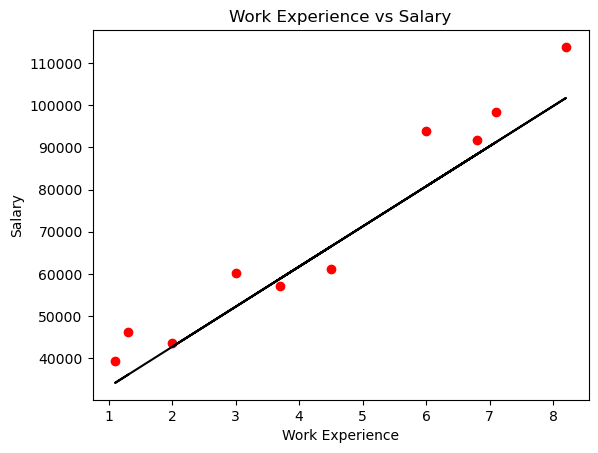

In [39]:
# Visualizing the predicted values and actual values

plt.scatter(X_test, Y_test, color = 'red') # true values
plt.plot(X_test, test_data_prediction, color = 'black') #values predicted by our model
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Work Experience vs Salary")
plt.show()